In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [3]:
df=pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.head(30)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
for x in ['N','P','K']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = min
    df.loc[df[x] > max,x] = max

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,52.743182,38.376364,25.616244,71.481779,6.469480,103.463655
std,36.917334,31.427156,23.460322,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,128.000000,92.500000,43.675493,99.981876,9.935091,298.560117


In [10]:
df.nunique()

N               137
P               100
K                63
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [11]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [13]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,92.50,20.80,126.66,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,92.50,23.18,126.46,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [14]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,92.50,20.80,126.66,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,92.50,23.18,126.46,81.875228,6.025937,69.611829,23.849575
8,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
9,kidneybeans,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085


In [15]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.227834,0.019000,0.026504,0.190688,0.096683,0.059020
P,-0.227834,1.000000,0.561850,-0.123040,-0.138916,-0.132720,-0.063176
K,0.019000,0.561850,1.000000,-0.149220,0.119685,-0.101339,-0.021690
temperature,0.026504,-0.123040,-0.149220,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.138916,0.119685,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.132720,-0.101339,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063176,-0.021690,-0.030084,0.094423,-0.109069,1.000000


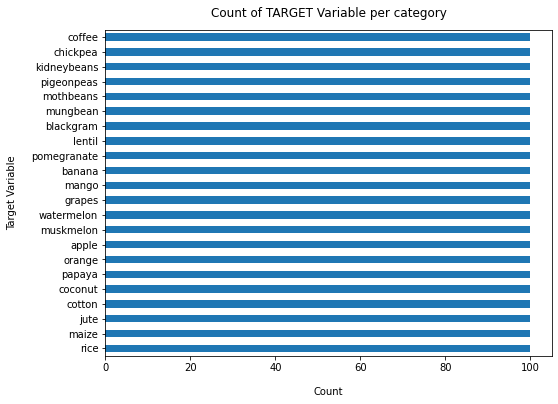

In [16]:

df['label'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [17]:

from imblearn.combine import SMOTEENN


In [18]:
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

In [19]:
labels_mapping = {'rice':0,'maize':1, 'chickpea':2, 'kidneybeans':3, 'pigeonpeas':4,
       'mothbeans':5, 'mungbean':6, 'blackgram':7, 'lentil':8, 'pomegranate':9,
       'banana':10, 'mango':11, 'grapes':12, 'watermelon':13, 'muskmelon':14, 'apple':15,
       'orange':16, 'papaya':17, 'coconut':18, 'cotton':19, 'jute':20, 'coffee':21}

df["label"] = df["label"].map(labels_mapping)
df['label'].unique()



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [20]:
df['label'][0]

0

In [21]:
df=df.drop(columns=['N','K','P'],axis=1)

In [22]:
features = df.columns[:-1]
X = df[features] 
y = df['label']

In [23]:
X_train, X_val_, y_train, y_val_ = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
X_val, X_test, y_val, y_test = train_test_split(X_val_, y_val_, test_size = 0.5, random_state = 42)

In [25]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X val :", X_val.shape)
print("Shape of the y val :", y_val.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1540, 4)
Shape of the y Train : (1540,)
Shape of the X val : (330, 4)
Shape of the y val : (330,)
Shape of the X test : (330, 4)
Shape of the y test : (330,)


In [26]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.98482053, 1.72128389, 0.69906821, 1.6669675 ])

In [27]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

humidity       1.721284
rainfall       1.666967
temperature    0.984821
ph             0.699068
dtype: float64

<AxesSubplot:>

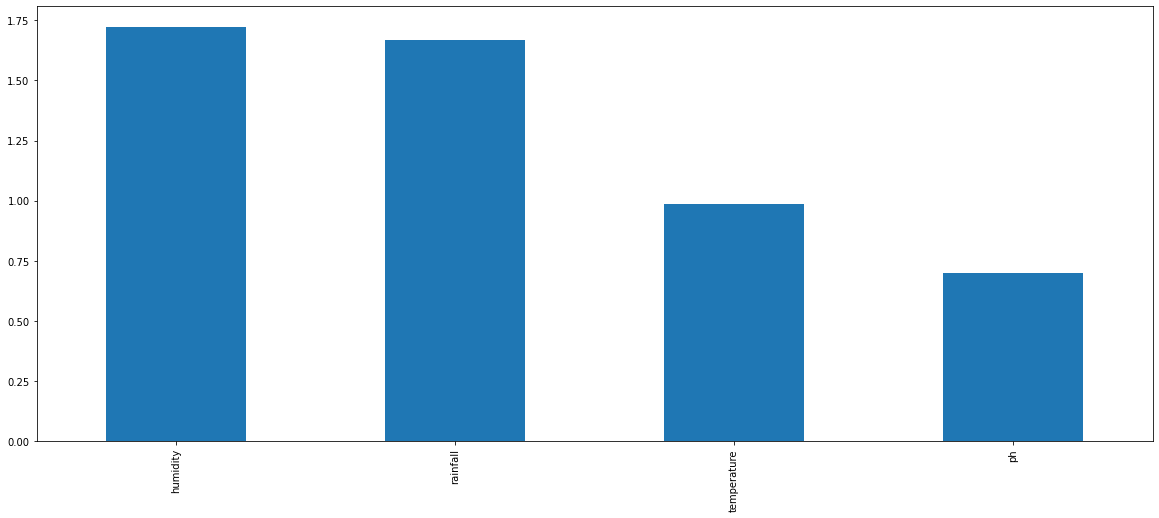

In [28]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [29]:
pip install verstack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 52.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 80.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 76.8 MB/s eta 0:00:0000:0100:01
  Created wheel for verstack: filename=verstack-3.6.5-py3-none-any.whl size=95598 sha256=22869a9ce40dc146a70954627e37f64662b326c738292cd3296f8444381246b2
  Stored in directory: /root/.cache/pip/wheels/62/c0/1e/eaa1076a964262eca6233cc9a84635e4eb1c56255c4f9cc6b7
Successfully built verstack
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successf

In [30]:
from verstack import LGBMTuner



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.18946174032952742
     .. Evaluation score (greater-better): accuracy: 0.948051948051948
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.23483989446696782
     .. Evaluation score (greater-better): accuracy: 0.9402597402597402
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.22398398781952725
     .. Evaluation score (greater-better): accuracy: 0.948051948051948
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.

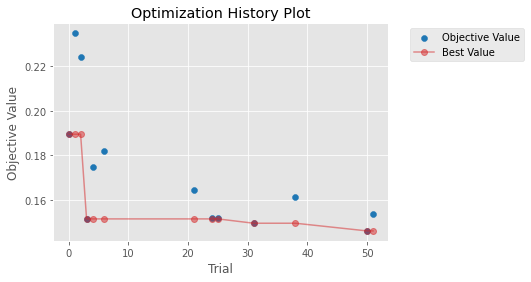

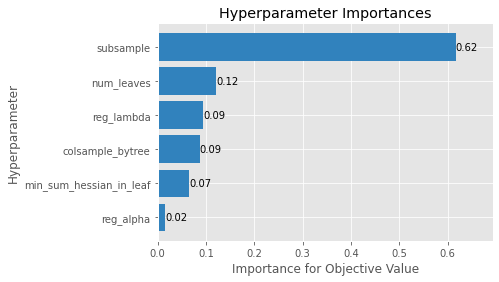

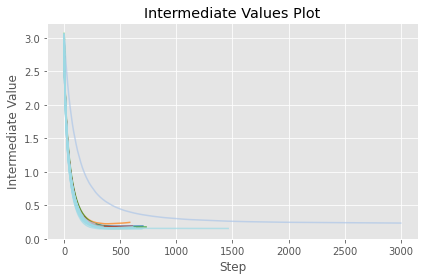

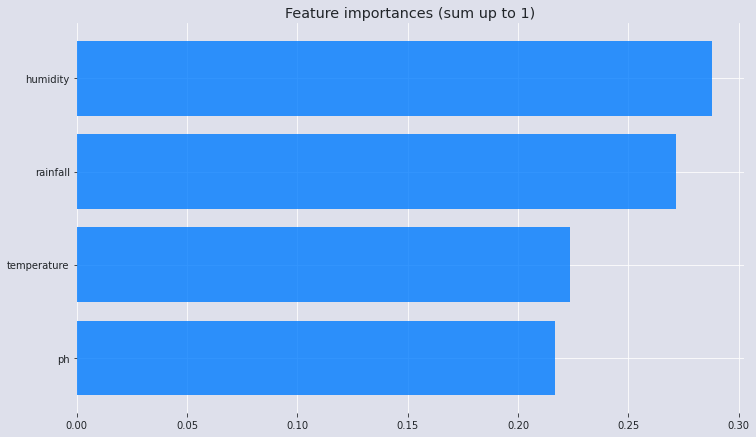


     . Optuna hyperparameters optimization finished
     .. Best trial number:50    |     log_loss:            0.145990448427186
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration: 1187   |     multi_logloss:          0.19001145879740586

Time elapsed for fit execution: 1 min 26.295 sec


In [31]:

tuner = LGBMTuner(metric = 'accuracy')
tuner.fit(X_train, y_train)

In [32]:
!pip install lazypredict

In [33]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [34]:

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:04<00:00,  5.81it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.95,0.95,None,0.95,0.35
GaussianNB,0.95,0.95,None,0.95,0.01
QuadraticDiscriminantAnalysis,0.95,0.95,None,0.95,0.01
XGBClassifier,0.94,0.94,None,0.94,1.16
LGBMClassifier,0.94,0.94,None,0.94,1.14
ExtraTreesClassifier,0.94,0.94,None,0.94,0.21
BaggingClassifier,0.92,0.93,None,0.92,0.06
DecisionTreeClassifier,0.90,0.90,None,0.90,0.02
LabelPropagation,0.88,0.89,None,0.88,0.08


In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
print(q)

In [42]:
RF_accuracy = RF.score(X_test,y_test)
RF_accuracy

0.9515151515151515

In [43]:
import pickle

In [47]:
file_name='trained_model3.sav'

In [48]:
pickle.dump(RF,open(file_name,'wb'))

In [ ]:
loaded_model

In [ ]:
pip install pipreqs

In [ ]:
pipreqs --encoding utf-8 
